In [1]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

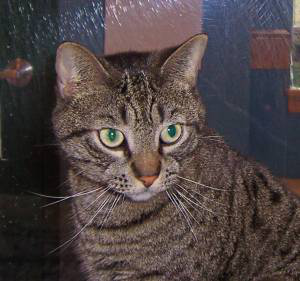

In [2]:
img1 = Image.open('data/train/cat/1.jpg')
display(img1)

In [3]:
np.array(img1).shape

(281, 300, 3)

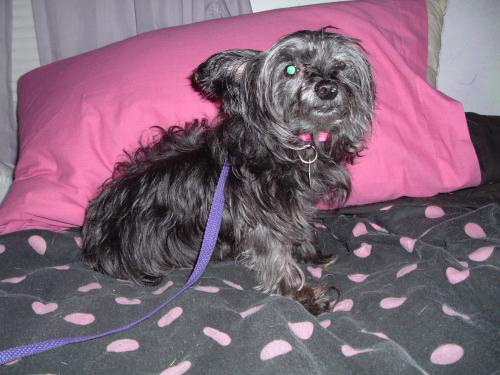

(375, 500, 3)


In [4]:
img2 = Image.open('data/train/dog/0.jpg')
display(img2)
print(np.array(img2).shape)

In [5]:
np.array(img2)

array([[[117, 115, 126],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [132, 132, 142],
        [131, 131, 141],
        [131, 131, 141]],

       [[118, 116, 127],
        [117, 115, 126],
        [119, 117, 130],
        ...,
        [134, 134, 144],
        [133, 133, 143],
        [133, 133, 143]],

       [[119, 117, 128],
        [118, 116, 127],
        [120, 118, 131],
        ...,
        [136, 136, 146],
        [135, 135, 145],
        [135, 135, 145]],

       ...,

       [[ 75,  80,  84],
        [ 70,  75,  79],
        [ 69,  74,  78],
        ...,
        [ 74,  82,  85],
        [ 70,  78,  81],
        [ 67,  75,  78]],

       [[ 74,  79,  83],
        [ 68,  73,  77],
        [ 65,  70,  74],
        ...,
        [ 66,  74,  77],
        [ 67,  75,  78],
        [ 68,  76,  79]],

       [[ 70,  75,  79],
        [ 67,  72,  76],
        [ 66,  71,  75],
        ...,
        [ 69,  77,  80],
        [ 67,  75,  78],
        [ 65,  73,  76]]

In [27]:
np.array(img2) / 255.0

array([[[0.45882353, 0.45098039, 0.49411765],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.51764706, 0.51764706, 0.55686275],
        [0.51372549, 0.51372549, 0.55294118],
        [0.51372549, 0.51372549, 0.55294118]],

       [[0.4627451 , 0.45490196, 0.49803922],
        [0.45882353, 0.45098039, 0.49411765],
        [0.46666667, 0.45882353, 0.50980392],
        ...,
        [0.5254902 , 0.5254902 , 0.56470588],
        [0.52156863, 0.52156863, 0.56078431],
        [0.52156863, 0.52156863, 0.56078431]],

       [[0.46666667, 0.45882353, 0.50196078],
        [0.4627451 , 0.45490196, 0.49803922],
        [0.47058824, 0.4627451 , 0.51372549],
        ...,
        [0.53333333, 0.53333333, 0.57254902],
        [0.52941176, 0.52941176, 0.56862745],
        [0.52941176, 0.52941176, 0.56862745]],

       ...,

       [[0.29411765, 0.31372549, 0.32941176],
        [0.2745098 , 0.29411765, 0.30980392],
        [0.27058824, 0

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [7]:
train_data = train_datagen.flow_from_directory(
    directory = 'data/train',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 64,
    seed = 42
)

Found 20030 images belonging to 2 classes.


In [8]:
first_batch = train_data.next()

In [9]:
first_batch[0].shape, first_batch[1].shape

((64, 224, 224, 3), (64, 2))

In [10]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 64
    num_row, num_col = 8, 8
    fix, axes = plt.subplots(num_row, num_col, figsize = (3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype = 'uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
    
    plt.tight_layout()
    plt.show()

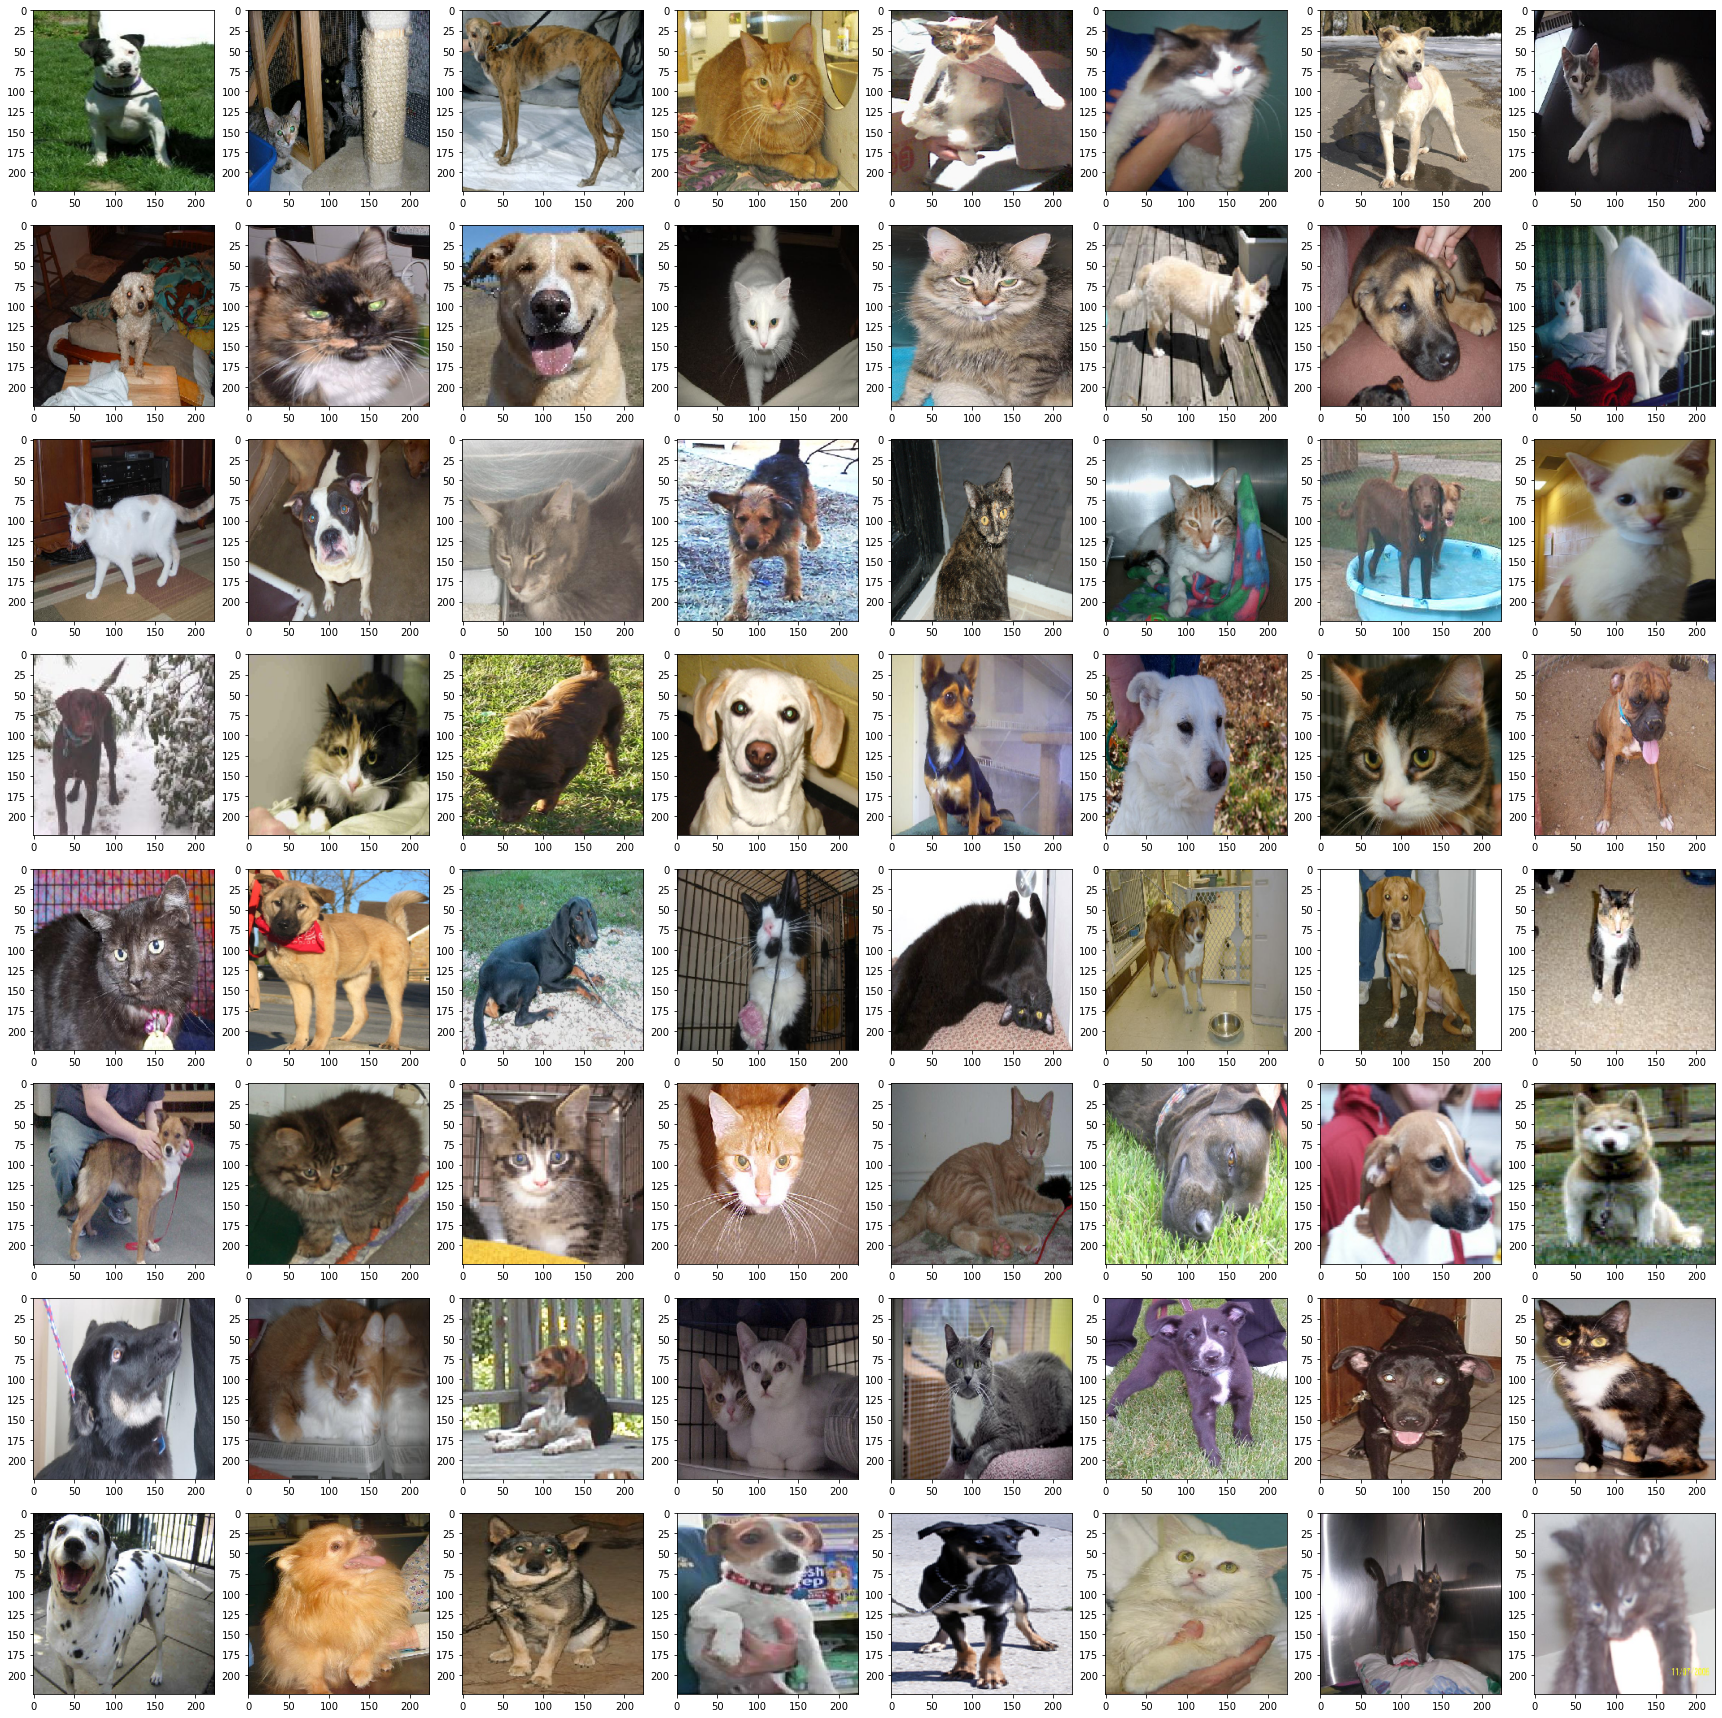

In [33]:
visualize_batch(batch = first_batch)

In [11]:
train_data = train_datagen.flow_from_directory(
    directory = 'data/train',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 64,
    seed = 42
)
valid_data = train_datagen.flow_from_directory(
    directory = 'data/validation',
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 64,
    seed = 42
)

Found 20030 images belonging to 2 classes.
Found 2478 images belonging to 2 classes.


In [36]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

model_1.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy')]
)

history_1 = model_1.fit(
    train_data,
    validation_data = valid_data,
    epochs = 10
)

Epoch 1/10
313/313 [==============================] - 611s 2s/step - loss: 1.2622 - accuracy: 0.6076 - val_loss: 0.6033 - val_accuracy: 0.6751
Epoch 2/10
313/313 [==============================] - 426s 1s/step - loss: 0.5618 - accuracy: 0.7084 - val_loss: 0.5583 - val_accuracy: 0.7090
Epoch 3/10
313/313 [==============================] - 430s 1s/step - loss: 0.4808 - accuracy: 0.7709 - val_loss: 0.5539 - val_accuracy: 0.7224
Epoch 4/10
313/313 [==============================] - 433s 1s/step - loss: 0.4000 - accuracy: 0.8246 - val_loss: 0.5422 - val_accuracy: 0.7385
Epoch 5/10
313/313 [==============================] - 456s 1s/step - loss: 0.3266 - accuracy: 0.8625 - val_loss: 0.5870 - val_accuracy: 0.7349
Epoch 6/10
313/313 [==============================] - 431s 1s/step - loss: 0.2492 - accuracy: 0.9030 - val_loss: 0.6179 - val_accuracy: 0.7316
Epoch 7/10
313/313 [==============================] - 546s 2s/step - loss: 0.1791 - accuracy: 0.9353 - val_loss: 0.6950 - val_accuracy: 0.7413

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

model_2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy')]
)

history_2 = model_2.fit(
    train_data,
    validation_data = valid_data,
    epochs = 10
)

Epoch 1/10
313/313 [==============================] - 669s 2s/step - loss: 1.0850 - accuracy: 0.6506 - val_loss: 0.5821 - val_accuracy: 0.7038
Epoch 2/10
313/313 [==============================] - 640s 2s/step - loss: 0.4472 - accuracy: 0.7950 - val_loss: 0.5802 - val_accuracy: 0.7252
Epoch 3/10
313/313 [==============================] - 706s 2s/step - loss: 0.2898 - accuracy: 0.8823 - val_loss: 0.6686 - val_accuracy: 0.7179
Epoch 4/10
313/313 [==============================] - 728s 2s/step - loss: 0.1658 - accuracy: 0.9418 - val_loss: 0.7866 - val_accuracy: 0.7066
Epoch 5/10
313/313 [==============================] - 573s 2s/step - loss: 0.1008 - accuracy: 0.9711 - val_loss: 0.9316 - val_accuracy: 0.7268
Epoch 6/10
313/313 [==============================] - 605s 2s/step - loss: 0.0663 - accuracy: 0.9831 - val_loss: 1.0364 - val_accuracy: 0.7159
Epoch 7/10
313/313 [==============================] - 573s 2s/step - loss: 0.0476 - accuracy: 0.9885 - val_loss: 1.2574 - val_accuracy: 0.7187

In [16]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

model_3.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy')]
)

history_3 = model_3.fit(
    train_data,
    validation_data = valid_data,
    epochs = 10
)

Epoch 1/10
313/313 [==============================] - 971s 3s/step - loss: 0.6678 - accuracy: 0.6523 - val_loss: 0.5534 - val_accuracy: 0.7094
Epoch 2/10
313/313 [==============================] - 761s 2s/step - loss: 0.4907 - accuracy: 0.7634 - val_loss: 0.5277 - val_accuracy: 0.7377
Epoch 3/10
313/313 [==============================] - 839s 3s/step - loss: 0.3742 - accuracy: 0.8331 - val_loss: 0.5292 - val_accuracy: 0.7454
Epoch 4/10
313/313 [==============================] - 1178s 4s/step - loss: 0.2298 - accuracy: 0.9072 - val_loss: 0.6238 - val_accuracy: 0.7571
Epoch 5/10
313/313 [==============================] - 771s 2s/step - loss: 0.1043 - accuracy: 0.9647 - val_loss: 0.7716 - val_accuracy: 0.7470
Epoch 6/10
313/313 [==============================] - 765s 2s/step - loss: 0.0474 - accuracy: 0.9864 - val_loss: 0.9813 - val_accuracy: 0.7575
Epoch 7/10
313/313 [==============================] - 771s 2s/step - loss: 0.0207 - accuracy: 0.9963 - val_loss: 1.1655 - val_accuracy: 0.757

In [24]:
model_3.save("CNN_model.h5")

In [13]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size = (224, 224))
    return np.array(img) / 255.0

In [17]:
single_image = prepare_single_image(img_path = 'data/test/dog/melinina_macka.jpg')
single_image

array([[[0.49019608, 0.46666667, 0.46666667],
        [0.5254902 , 0.51764706, 0.51372549],
        [0.41176471, 0.41568627, 0.40784314],
        ...,
        [0.49019608, 0.49411765, 0.31372549],
        [0.39215686, 0.4       , 0.25882353],
        [0.32941176, 0.33333333, 0.21176471]],

       [[0.43137255, 0.35686275, 0.34901961],
        [0.43137255, 0.37254902, 0.36078431],
        [0.50980392, 0.4745098 , 0.45882353],
        ...,
        [0.52156863, 0.53333333, 0.35294118],
        [0.4627451 , 0.47058824, 0.32156863],
        [0.30196078, 0.30588235, 0.18039216]],

       [[0.54901961, 0.47058824, 0.43921569],
        [0.44705882, 0.36862745, 0.34117647],
        [0.59607843, 0.51764706, 0.49803922],
        ...,
        [0.45490196, 0.46666667, 0.29019608],
        [0.34901961, 0.35686275, 0.22745098],
        [0.23529412, 0.23529412, 0.1254902 ]],

       ...,

       [[0.30196078, 0.31372549, 0.3254902 ],
        [0.36470588, 0.37254902, 0.38431373],
        [0.32941176, 0

In [18]:
single_prediction = model_3.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

array([[0.00111478, 0.9988852 ]], dtype=float32)

In [19]:
single_prediction.argmax()

1

In [45]:
num_total_cat, num_correct_cat = 0, 0
num_total_dog, num_correct_dog = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/cat').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_cat += 1
        if pred == 0:
            num_correct_cat += 1
    except Exception as e:
        continue
        
for img_path in pathlib.Path.cwd().joinpath('data/test/dog').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model_3.predict(tf.expand_dims(img, axis=0))
        pred = pred.argmax()
        num_total_dog += 1
        if pred == 1:
            num_correct_dog += 1
    except Exception as e:
        continue

In [46]:
num_total_cat

1243

In [47]:
num_correct_cat / num_total_cat

0.6878519710378117

In [48]:
num_total_dog

1240

In [49]:
num_correct_dog / num_total_dog

0.7362903225806452